***Emma Arenas Villaverde***

# Análisis de datos estadístico sobre la Prueba de tolerancia a la glucosa

La **prueba de tolerancia a la glucosa**, también conocida como «examen de tolerancia oral a la glucosa», mide la respuesta del cuerpo al azúcar (glucosa). Esta prueba se puede usar como prueba de detección para la diabetes de tipo 2. En el departamento de investigación de un hospital se está realizando un estudio para conocer si la tolerancia a la glucosa en pacientes sanos tiende a decrecer a medida que la edad de la persona aumenta, es decir tarda más tiempo en desaparecer en nuestro organismo conforme envejecemos. Para obtener las conclusiones del estudio se suministra una dosis de glucosa, en forma de un preparado via oral, a dos muestras de pacientes sanos escogidos al azar, jóvenes (edad menor de 30) y otros adultos (edad superior a 30). Consideraremos estas muestras independientes.

El test consistió en realizar la medición de glucosa en sangre en el momento de la toma (nivel basal ) de 100 gramos de glucosa y a los 60 minutos de la toma. Los resultados se muestran en el Excel. En la primera columna se representa con 1 a los pacientes cuyo rango de edad es menor que 30 (jóvenes) y con 2 a los pacientes cuyo rango de edad es mayor que 30, en la segunda columna la concentración en sangre en el momento de la toma (nivel basal, en mg/Dl) y en la tercera columna la concentración de glucosa pasada una hora de la ingesta de la pastilla en mg/Dl

### Instalación y carga de librerías

Para realizar los ejercicios, primero instalaré y cargaré todas las **librerías de R** necesarias para esta tarea:

In [ ]:
install.packages("readxl")
install.packages("dplyr")
install.packages("modeest")
install.packages("ggplot2")
install.packages("moments")

- `readxl` : esta librería permite importar datos desde un archivo Excel. Nos permite cargar nuestro conjunto de datos de forma rápida y eficiente en el entorno R.
- `dplyr` : esta librería facilita la manipulación y transformación de los datos de forma eficiente y legible.
- `modest` : esta librería proporciona herramientas para calcular y analizar la moda estadística.
- `ggplot2` : esta librería crea visualizaciones gráficas de alta calidad que permiten explorar y comunicar los resultados.
- `moments` : esta librería permite calcular medidas estadísticas relacionadas con la forma de una distribución, como la asimetría (skewness) y la curtosis.

In [120]:
library(readxl)

In [ ]:
library(dplyr)

In [122]:
library(modeest)

In [123]:
library(ggplot2) 

In [124]:
library(moments) 

### Carga del dataset

A continuación, pasaré a cargar nuestro **dataset** para empezar a trabajar con él:

In [125]:
test_glucosa <- read_xlsx(path = "EVALMASTER.xlsx")

### Análisis descriptivo de los datos

Antes de comenzar con el primer ejercicio, voy a realizar un **Análisis descriptivo de los datos** para comprender bien el **dataset** con el que estoy trabajando:

In [126]:
str(test_glucosa)

tibble [65 × 3] (S3: tbl_df/tbl/data.frame)
 $ Grupo de control    : num [1:65] 1 1 1 1 1 1 1 1 1 1 ...
 $ Nivel glucosa basal : num [1:65] 90 82 80 75 74 97 103 76 65 89 ...
 $ Nivel glucosa 60 min: num [1:65] 159 151 148 138 141 157 172 150 131 156 ...


Podemos ver que el **dataset** consta de **65 observaciones y 3 variables** (65 filas y 3 columnas).
- Variable `Grupo de control` : de tipo numérico. Representa con **1** a los pacientes cuyo rango de edad es menor que 30 (jóvenes) y con **2** a los pacientes cuyo rango de edad es mayor que 30.
- Variable `Nivel glucosa basal`: de tipo numérico. Representa la concentración en sangre en el momento de la toma (nivel basal, en mg/Dl).
- Variable `Nivel glucosa 60 min`: de tipo numérico. Representa la concentración de glucosa pasada una hora de la ingesta de la pastilla (en mg/Dl).

También voy a mostrar las **6 primeras y últimas filas** del **dataset** para tener una visión más completa de los datos:

In [127]:
head(test_glucosa)

Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
<dbl>,<dbl>,<dbl>
1,90,159
1,82,151
1,80,148
1,75,138
1,74,141
1,97,157


In [128]:
tail(test_glucosa)

Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
<dbl>,<dbl>,<dbl>
2,91,172
2,95,169
2,99,172
2,88,173
2,84,188
2,92,160


---

## Ejercicio 1

Una vez tengo clara la estructura, la cantidad, y el tipo de datos con los que trabajaré. Voy a comenzar a realizar el **Ejercicio 1**:

### a) Obtener, usando algún programa estadístico, las medidas de centralización y dispersión para cada uno de los dos grupos de control para el nivel de glucosa basal, especificando para cada uno de los casos si la media es o no representativa

#### Grupo 1 (Jóvenes)

##### Medidas de centralización:

In [129]:
mean(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 84.68571

Como se observa, el promedio general de los datos (`media aritmética`) es de aproximadamente **84,69 mg/Dl**.

In [130]:
median(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 82

Por otro lado, el valor central cuando los datos están ordenados (`mediana (segundo cuartil)`) es **82 mg/Dl**.

In [131]:
mfv(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 75 79 82 90

Por su parte, el valor que ocurre con más frecuencia (`moda`) es de **75**, **79**, **82** y **90 mg/Dl**. Esto nos indica que se trata de un conjunto de datos **multimodal**, en concreto; **tetramodal**.

**Conclusiones**

La media (**84.69**) es mayor que la mediana (**82**), lo que sugiere que la distribución está sesgada positivamente (hacia la derecha). Es decir, hay valores altos que están "tirando" la media hacia arriba. Además, que haya cuatro modas (**75, 79, 82 y 90**), y tan alejada la más baja de la más alta, indica que los valores de glucosa están bastante dispersos, lo que puede estar relacionado con diferencias de edad dentro de los jóvenes, metabolismo, u otros factores.

##### Medidas de dispersión:

In [132]:
summary(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   78.50   82.00   84.69   90.50  103.00 

In [133]:
diff(range(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1]))

[1] 38

En cuanto a las medidas de dispersión, el valor `mínimo` es **65 mg/Dl** y el valor `máximo` **103 mg/Dl**; lo que supone que el `rango` sea de **38 mg/Dl**.

Por su parte, el `primer cuartil (Q1)` es **78,50 mg/Dl** y el `tercer cuartil (Q3)` **90,50 mg/Dl**. Esto significa que el 25% de los valores está por debajo de **78,50** y que el 25% superior está por encima de **90,50**.

In [134]:
IQR(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 12

Respecto al `rango intercuartílico (IQR)`, el 50% central de los datos tiene una dispersión bastante baja (solo **12 mg/Dl** de diferencia).

In [135]:
sd(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 8.844312

La `desviación típica` del nivel de glucosa basal de los jóvenes es de aproximadamente **8,84**, por lo que podemos decir que los datos están moderadamente agrupados alrededor de la media.

In [136]:
var(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])

[1] 78.22185

Una `varianza` del **78,22** reafirma que los datos están distribuidos de forma consistente, aunque no extremadamente concentrados.

In [137]:
stem(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])


  The decimal point is 1 digit(s) to the right of the |

   6 | 5
   7 | 4
   7 | 5556678999
   8 | 0112223
   8 | 5699
   9 | 0001234
   9 | 779
  10 | 03



En el `diagrama de tallo y hojas` se comprueba que los datos están distribuidos en un rango de **65** a **103**. Además, el grueso de valores se encuentra en los tallos de **8** y **9**; reafirmando la mediana **82** y la media **84,69**. Por último, la escasez de valores en los extremos **6** y **10** sugiere que no hay atípicos significativos.

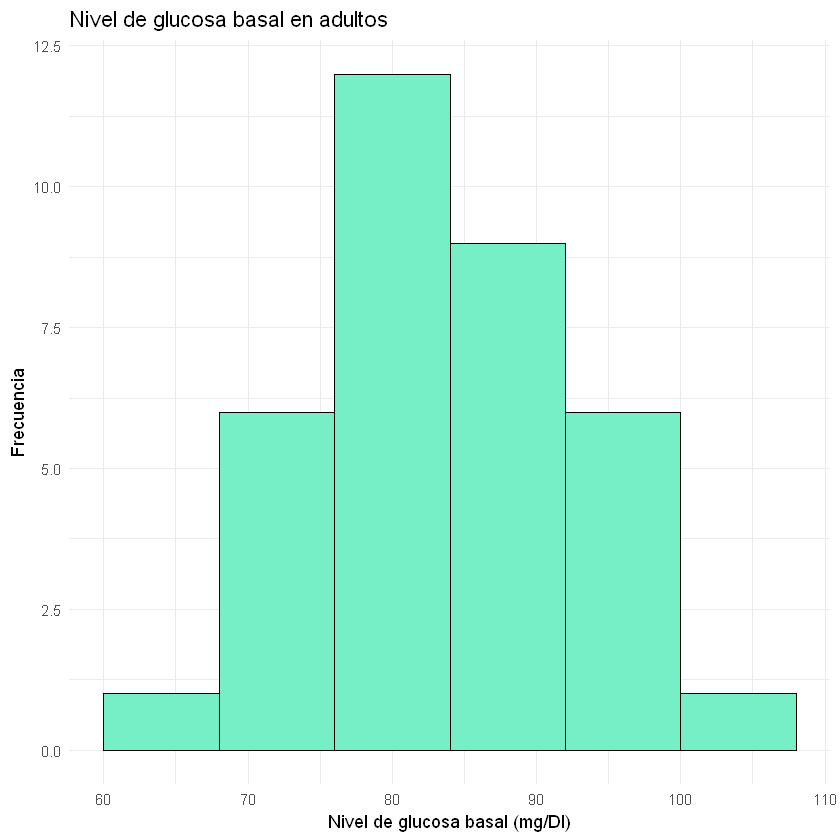

In [138]:
test_glucosa_basal1 <- test_glucosa[test_glucosa$`Grupo de control` == 1, ]


ggplot(data = test_glucosa_basal1, aes(x = `Nivel glucosa basal`)) +
  geom_histogram(
    binwidth = 8,  
    fill = "aquamarine2",
    color = "black"
  ) +
  labs(
    title = "Nivel de glucosa basal en adultos",
    x = "Nivel de glucosa basal (mg/Dl)",
    y = "Frecuencia"
  ) +
  theme_minimal()       

Por su parte, el `histograma` muestra una forma cercana a una **distribución normal** con un leve sesgo positivo (hacia la derecha), lo que confirma lo que comentaba antes.
También, hay una alta frecuencia de valores en el rango **78-90** que coincide con el rango intercuartil calculado (IQR).
Hay pocas observaciones en los extremos (por debajo de **70** y por encima de **100**);  indicando una dispersión baja en general.

In [139]:
((sd(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])) / (mean(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1])))

[1] 0.1044369

Por último, un `coeficiente de variación` del **10,44%** indica una baja variabilidad respecto a la media, por lo que podríamos decir que los datos son representativos y consistentes.

**Conclusiones**

La baja dispersión de los datos respalda que las conclusiones basadas en estos valores son confiables y que el grupo de jóvenes tiene niveles basales relativamente homogéneos. Esto refuerza que cualquier comparación con el grupo de los adultos puede atribuirse a diferencias reales y no a una alta variabilidad dentro del grupo joven.

#### Grupo 2 (Adultos)

##### Medidas de centralización:

In [140]:
mean(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 89.4

En este caso, el promedio general de los datos (`media aritmética`) es de **89,4 mg/Dl**.

In [141]:
median(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 90

En este grupo, el valor central cuando los datos están ordenados (`mediana (segundo cuartil)`) es **90 mg/Dl**.

In [142]:
mfv(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 88

Aquí, el valor que ocurre con más frecuencia (`moda`) es de **80 mg/Dl**. Esto nos indica que se trata de un conjunto de datos **unimodal**.

**Conclusiones**

La media (**89.4**) y la mediana (**90**) están muy próximas, lo que sugiere que la distribución de los valores es aproximadamente simétrica. En general, los valores de la media, mediana y moda son muy cercanos entre sí, lo que indica que los datos para este grupo están menos dispersos en comparación con el grupo de jóvenes.


##### Medidas de dispersión:

In [143]:
summary(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   77.0    84.5    90.0    89.4    94.0   104.0 

In [144]:
diff(range(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2]))

[1] 27

Las medidas de dispersión en adultos indican un valor `mínimo` de **77 mg/Dl** y un valor `máximo` de **104 mg/Dl**; siendo así el `rango` **27 mg/Dl**. Destaca que, en comparación con los jóvenes, tienen un punto de partida de glucosa ligeramente más elevado, además de que el menor rango supone datos menos dispersos.

Por otro lado, el `primer cuartil (Q1)` es **84,5 mg/Dl** y el `tercer cuartil (Q3)` **94 mg/Dl**. Todo ello nos indica que el 25% inferior está por debajo de **84.5**, mientras que el 25% superior supera los **94**.

In [145]:
IQR(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 9.5

El `rango intercuartílico (IQR)` más bajo en adultos (**9,5** frente a **12** en jóvenes) señala que la mayoría de los datos están más concentrados alrededor de la mediana, con menor variabilidad.

In [146]:
sd(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 7.346592

La `desviación típica` alrededor de la media es de aproximadamente **7,34**. Con este resultado podemos decir que los datos están moderadamente agrupados (incluso más que en los jóvenes).

In [147]:
var(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] 53.97241

La `varianza` del **53,97** es consistente con la desviación típica y reafirma la menor dispersión en los niveles basales de los adultos.

In [148]:
stem(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])


  The decimal point is 1 digit(s) to the right of the |

   7 | 7799
   8 | 0114
   8 | 688889
   9 | 000112344
   9 | 5669
  10 | 024



En el `diagrama de tallo y hojas` se comprueba que los datos están distribuidos en un rango de **77** a **104**. Asimismo, el grueso de valores se encuentra en los tallos de **8** y **9**; reafirmando la mediana **90** y la media **89,4**. En cuanto a los atípicos, no hay valores fuera del rango típico.

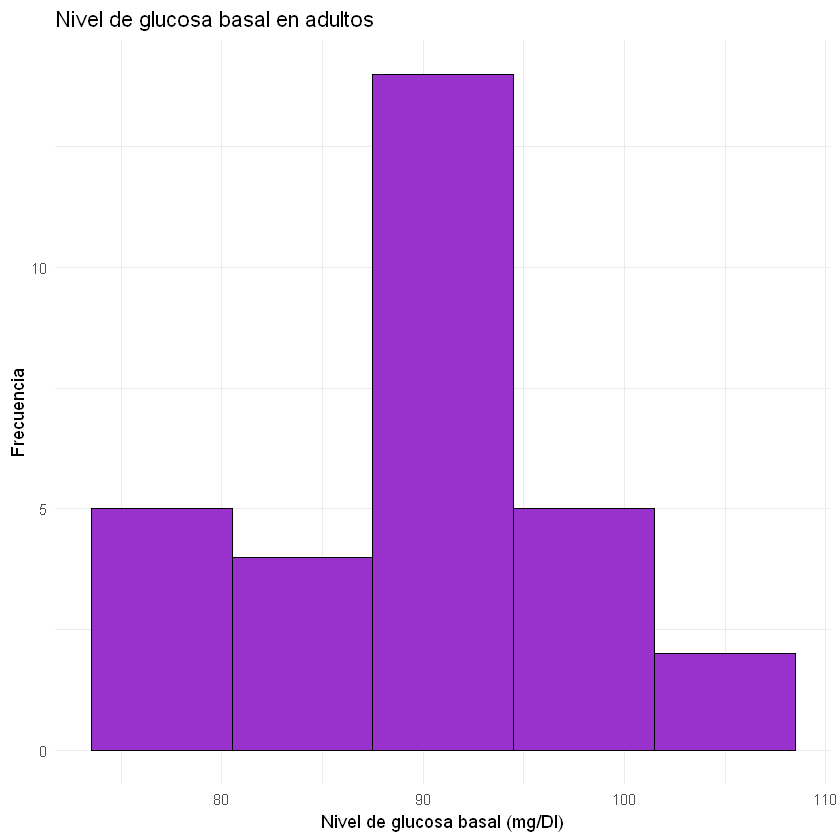

In [149]:
test_glucosa_basal2 <- test_glucosa[test_glucosa$`Grupo de control` == 2, ]

ggplot(data = test_glucosa_basal2, aes(x = `Nivel glucosa basal`)) +
  geom_histogram(
    binwidth = 7,  
    fill = "darkorchid",
    color = "black"
  ) +
  labs(
    title = "Nivel de glucosa basal en adultos",
    x = "Nivel de glucosa basal (mg/Dl)",
    y = "Frecuencia"
  ) +
  theme_minimal()

Pasando al `histograma`, se muestra también una **distribución normal cercana a la simetría**, con un pico en valores cercanos a **90 mg/Dl**.
Además, las barras en los extremos (por debajo de **80** y por encima de **100**) tienen frecuencias bajas, ya que la mayoría de los datos están concentrados en el centro.

In [150]:
((sd(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])) / (mean(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])))

[1] 0.08217664

Para acabar, el `coeficiente de variación` del **8,22%** indica que la dispersión relativa de los datos respecto a la media es baja, y demuestra que los datos de los adultos son muy representativos y consistentes.

**Conclusiones**

Los niveles basales de glucosa en adultos son menos dispersos que los de los jóvenes, por lo que podríamos decir que hay una mayor uniformidad en este grupo. No obstante, los valores de Q1, Q3, rango intercuartil, y rango total son más altos en adultos. Con un coeficiente de variación bajo (8,22%), los datos de este grupo son muy homogéneos y representativos, por lo que cualquier conclusión es estadísticamente sólida.
Comparación con jóvenes: Mientras los jóvenes muestran una mayor variabilidad y niveles basales más bajos, los adultos tienen valores más elevados y uniformes, lo que podría estar relacionado con cambios metabólicos asociados a la edad.

### b) Estudiar la simetría y la curtosis del nivel de glucosa basal en los adultos (grupo de control 2))

#### Simetría (Grupo 2)

In [151]:
skewness(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])

[1] -0.007090283

El valor aproximado **-0,0071** de la `simetría` se encuentra muy cercano a 0, lo que señala que la distribución es **prácticamente simétrica**. Esto es coherente con lo observado en el histograma y el diagrama de tallos y hojas, donde los datos se distribuyen uniformemente alrededor de la media.

#### Curtosis (Grupo 2)

In [152]:
kurtosis_glucosa <- kurtosis(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 2])
kurtosis_glucosa - 3

[1] -0.7087558

El valor aproximado de **-0,7088** de la `curtosis` indica que la distribución es **platicúrtica**, lo que significa que es más plana en comparación con una distribución normal. Esto refleja que los valores están menos concentrados en las colas de la distribución y se encuentran más distribuidos de manera uniforme alrededor del rango intercuartil, con una menor presencia de valores extremos. En consecuencia, los datos presentan una menor tendencia hacia colas pronunciadas o valores atípicos significativos.

### c) Indicar para cada una de las variables de estudio (nivel glucosa basal y nivel glucosa pasados 60 min) y en el grupo de control 1 el valor de los cuartiles y su significado y obtener el box-plot (diagrama de cajas) correspondiente. Estudiar la presencia devalores atípicos

#### Nivel de glucosa basal (Grupo 1)

In [153]:
summary(test_glucosa$"Nivel glucosa basal"[test_glucosa$"Grupo de control" == 1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   78.50   82.00   84.69   90.50  103.00 

Repasamos los valores que hemos obtenido en el apartado anterior:
- `Q1`: el 25% de los jóvenes tiene un nivel basal de glucosa inferior a **78,50 mg/Dl**.
- `Q2`: el 50% de los jóvenes tiene un nivel basal de glucosa inferior a **82 mg/Dl**. Esto representa el valor central de la distribución, indicando que la mitad de los datos están por encima y la otra mitad por debajo de este valor.
- `Q3`: el 75% de los jóvenes tiene un nivel basal de glucosa inferior a **90,50 mg/Dl**. Es decir, el 25% superior tiene niveles mayores a este valor.

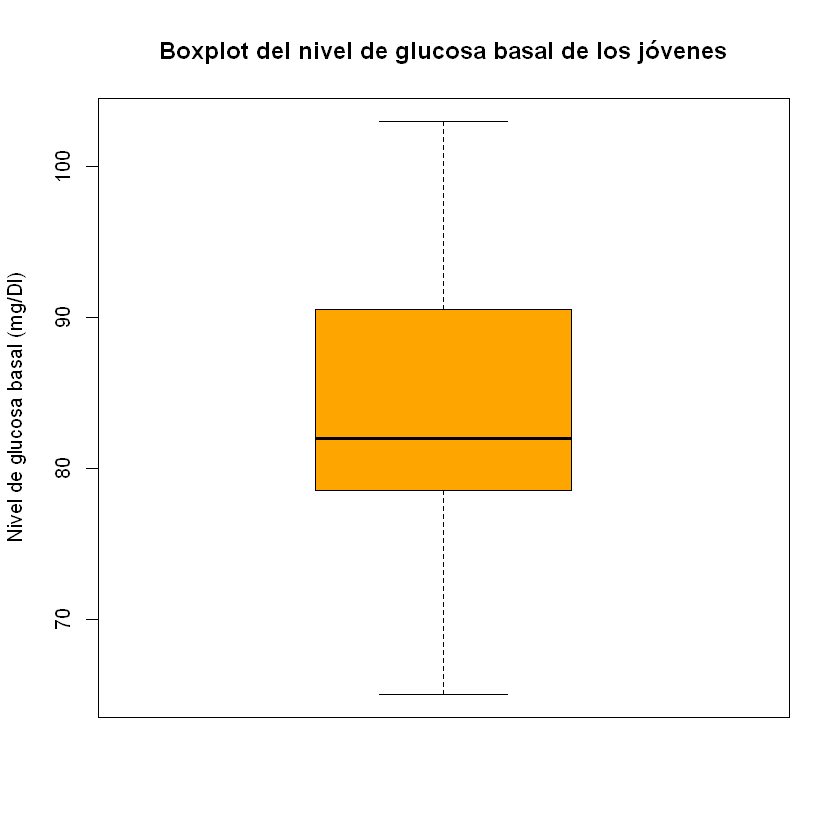

In [154]:
boxplot(test_glucosa$`Nivel glucosa basal`[test_glucosa$`Grupo de control` == 1],
        main = "Boxplot del nivel de glucosa basal de los jóvenes",
        ylab = "Nivel de glucosa basal (mg/Dl)",
        col = "orange")

A partir del `box-plot` generado, podemos observar que no existen puntos más allá de los bigotes, lo que significa que **no hay valores atípicos (outliers)**.

#### Nivel de glucosa pasados 60 min (Grupo 1)

In [155]:
summary(test_glucosa$"Nivel glucosa 60 min"[test_glucosa$"Grupo de control" == 1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  131.0   146.5   150.0   150.4   154.5   172.0 

- `Q1`: el 25% de los jóvenes tiene un nivel de glucosa a los 60 minutos inferior a **146,50 mg/Dl**.
- `Q2`: el 50% de los jóvenes tiene un nivel de glucosa a los 60 minutos inferior a **150 mg/Dl**. Esto representa el valor central de la distribución, indicando que la mitad de los datos están por encima y la otra mitad por debajo de este valor.
- `Q3`: el 75% de los jóvenes tiene un nivel de glucosa a los 60 minutos inferior a **154,50 mg/Dl**. Es decir, el 25% superior tiene niveles mayores a este valor.

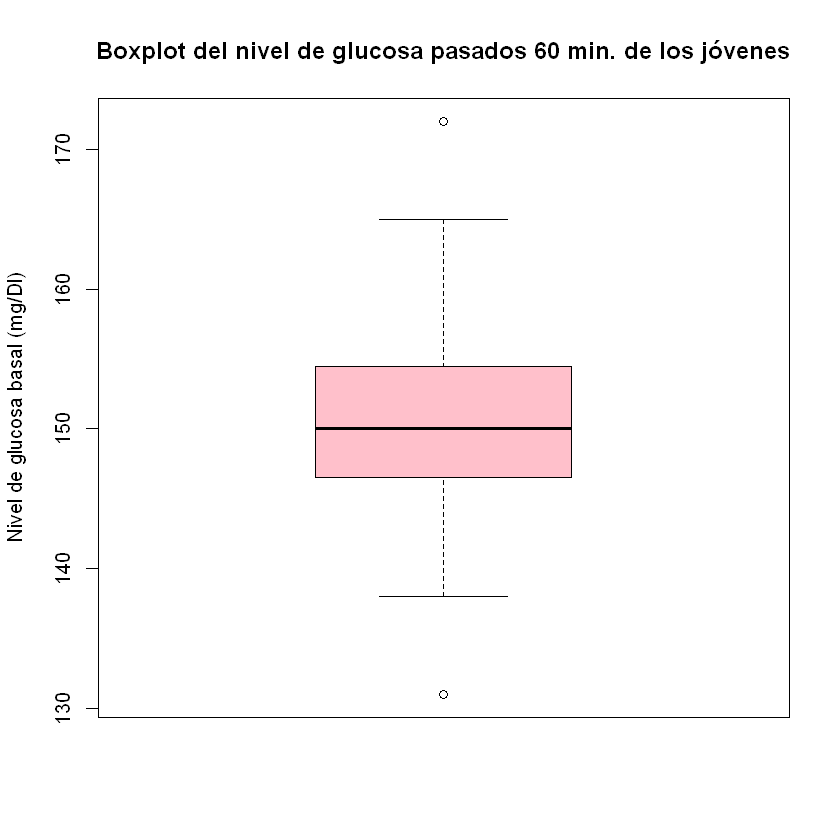

In [156]:
boxplot(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 1],
        main = "Boxplot del nivel de glucosa pasados 60 min. de los jóvenes",
        ylab = "Nivel de glucosa basal (mg/Dl)",
        col = "pink")

Como se puede ver en el `box-plot`, existen **dos valores atípicos**: uno por encima del bigote superior (de aproximadamente **170 mg/Dl**) y otro por debajo del bigote inferior (de aproximadamente **130 mg/Dl**).

### d) Estudiar la normalidad de los datos de cada uno de los grupos de control estudiados para el nivel de glucosa pasados 60 minutos

#### Grupo 1 (Jóvenes)

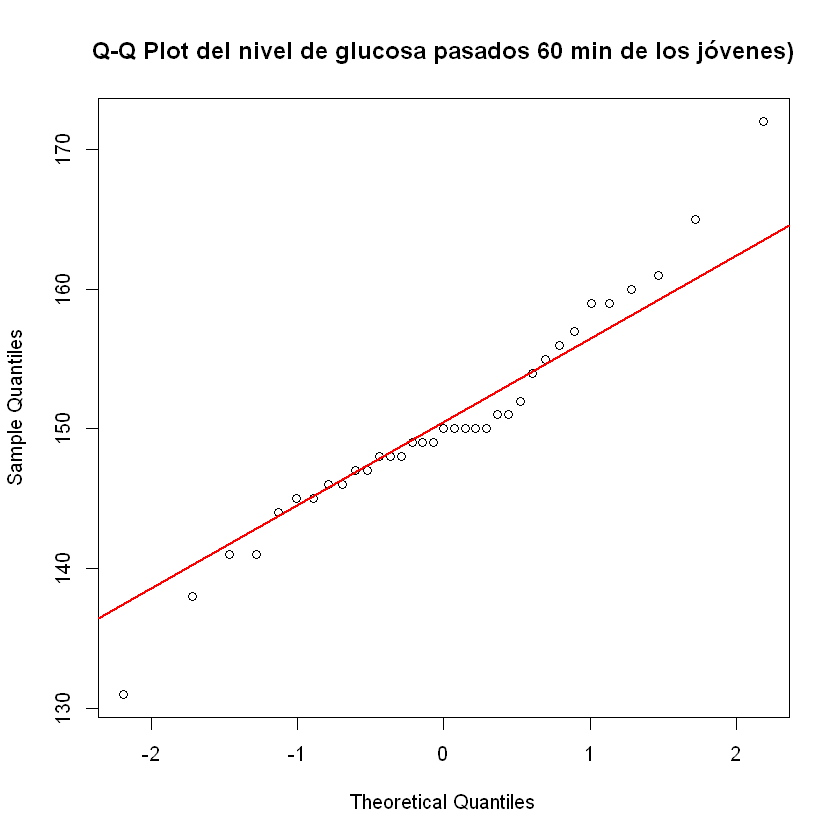

In [157]:
qqnorm(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 1],
       main = "Q-Q Plot del nivel de glucosa pasados 60 min de los jóvenes)")
qqline(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 1],
       col = "red", lwd = 2)

Creando un `Q-Q Plot` del nivel de glucosa pasados 60 minutos del grupo de jóvenes, podemos observar que la mayoría de los puntos se alinean bastante bien con la línea roja, que representa una distribución normal teórica. Si bien es cierto algunos puntos en los extremos se desvían ligeramente de la línea, pero el desvío no parece excesivo. En conclusión, el gráfico sugiere que los datos están aproximadamente **distribuidos de forma normal**, con solo ligeros desvíos en los extremos. Esto indica que los valores centrales se ajustan bien a la normalidad, mientras que los valores más altos o bajos podrían ser menos consistentes con una distribución normal.

In [158]:
shapiro.test(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 1])


	Shapiro-Wilk normality test

data:  test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 1]
W = 0.96261, p-value = 0.2734


Para corroborar el Q-Q Plot, al realizar la `prueba de Shapiro-Wilk` se ve que como el **valor-p** (**0,2734**) es mayor a 0,05, por lo que no podemos rechazar la hipótesis nula de normalidad. Esto significa que los datos no presentan evidencia suficiente para considerarlos no normales.

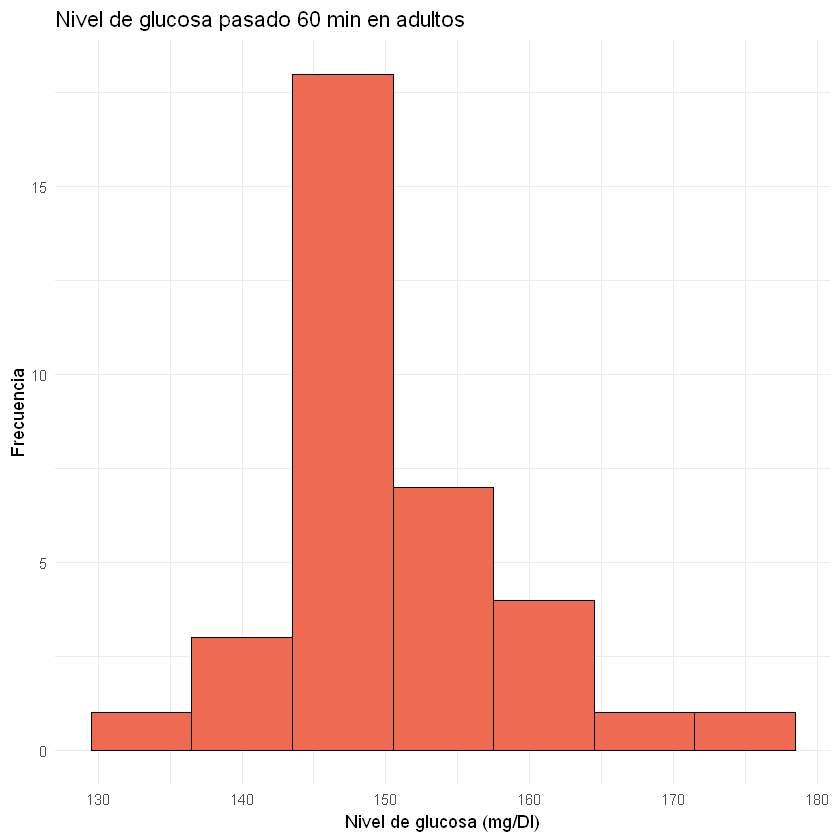

In [159]:
test_glucosa_60min1 <- test_glucosa[test_glucosa$`Grupo de control` == 1, ]


ggplot(data = test_glucosa_60min1, aes(x = `Nivel glucosa 60 min`)) +
  geom_histogram(
    binwidth = 7,  
    fill = "coral2",
    color = "black"
  ) +
  labs(
    title = "Nivel de glucosa pasado 60 min en adultos",
    x = "Nivel de glucosa (mg/Dl)",
    y = "Frecuencia"
  ) +
  theme_minimal() 

Por último, el `histograma` muestra una forma cercana a una **distribución normal**, con una concentración clara en el rango de **150 mg/Dl**. Este hallazgo es consistente con los resultados del Q-Q Plot y la prueba de Shapiro-Wilk.

#### Grupo 2 (Adultos)

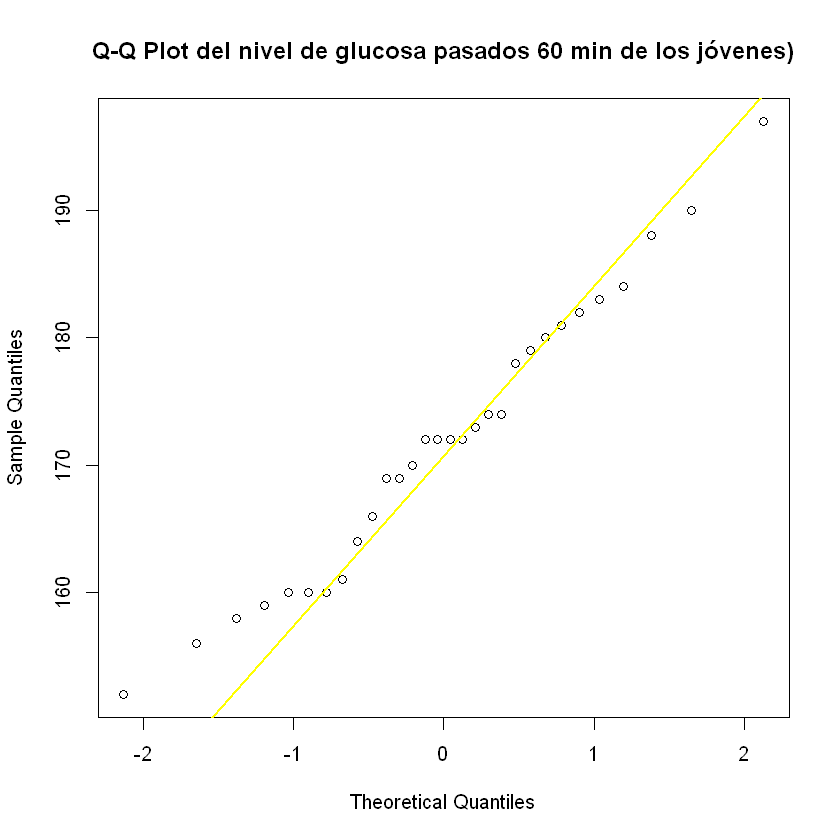

In [160]:
qqnorm(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 2],
       main = "Q-Q Plot del nivel de glucosa pasados 60 min de los jóvenes)")
qqline(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 2],
       col = "yellow", lwd = 2)

En el caso de los adultos, el `Q-Q Plot` indica que la mayoría de los puntos están alineados a lo largo de la línea amarilla, que representa la distribución normal teórica. Hay ligeros desvíos en los extremos, pero en general, los datos siguen muy bien la línea. En conclusión, los datos del nivel de glucosa pasados 60 minutos en adultos están **muy cerca de una distribución normal**.

In [161]:
shapiro.test(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 2])


	Shapiro-Wilk normality test

data:  test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 2]
W = 0.97761, p-value = 0.7592


Al igual que en los jóvenes, se realiza la `prueba de Shapiro-Wilk` para reafirmar estos resultados. Aquí, el **valor-p** es **0,7592**, por lo que al ser mucho mayor a 0,05 no se rechaza la hipótesis nula de normalidad. Esto significa que no hay evidencia suficiente para considerar que los datos no siguen una distribución normal.

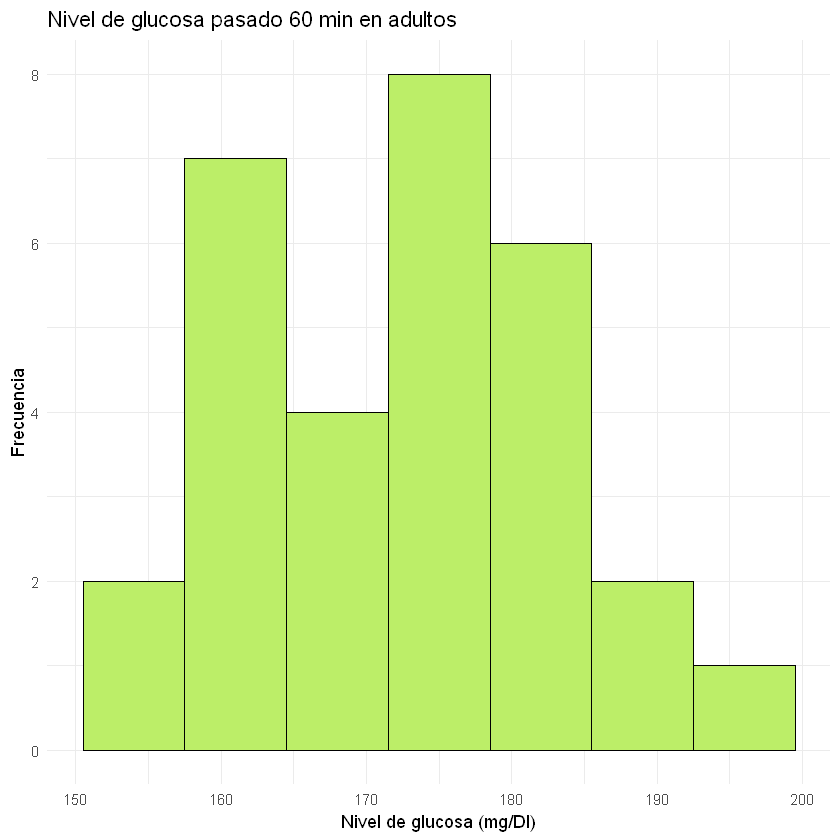

In [162]:
test_glucosa_60min2 <- test_glucosa[test_glucosa$`Grupo de control` == 2, ]


ggplot(data = test_glucosa_60min2, aes(x = `Nivel glucosa 60 min`)) +
  geom_histogram(
    binwidth = 7,  
    fill = "darkolivegreen2",
    color = "black"
  ) +
  labs(
    title = "Nivel de glucosa pasado 60 min en adultos",
    x = "Nivel de glucosa (mg/Dl)",
    y = "Frecuencia"
  ) +
  theme_minimal() 

Por último, el `histograma` muestra una forma aproximadamente simétrica, lo que sugiere una posible proximidad a la normalidad. Este hallazgo es respaldado por el resultado del test de Shapiro-Wilk, por lo que se puede concluir que la distribución de los datos es **consistente con una distribución normal** o al menos muy cercana a ella. Este patrón implica que los datos están centrados alrededor de un promedio con una dispersión típica esperada en una distribución normal. Sin embargo, para una validación más robusta, se podrían complementar estos resultados con el cálculo de la simetría.

In [163]:
skewness(test_glucosa$`Nivel glucosa 60 min`[test_glucosa$`Grupo de control` == 2])

[1] 0.2333982

El valor de simetría de **0,2334** indica que la distribución tiene una **ligera asimetría positiva**. Esto significa que los valores extremos en la cola derecha son un poco más frecuentes que en la cola izquierda, pero el efecto es muy leve. Dado que este valor está cerca de 0, la distribución puede seguir considerándose **cercana a la normalidad**.

---
## Ejercicio 2

A continuación, pasaré a realizar el **Ejercicio 2** apartado por apartado, el cual busca estudiar la relación existente entre el nivel basal y el nivel de glucosa que tienen los pacientes sanos jóvenes (grupo 1) una hora después de tomar el preparado de glucosa:

### a) Estudiar la relación lineal existente entre estas dos variables de estudio gráficamente y mediante algún valor estadístico de forma razonada

In [164]:
grupo1 <- test_glucosa[test_glucosa$`Grupo de control` == 1, ]
cor(grupo1$`Nivel glucosa basal`, grupo1$`Nivel glucosa 60 min`)

[1] 0.7964053

El `coeficiente de correlación` obtenido, de aproximadamente **0,7964**, indica que existe una **relación lineal positiva fuerte** entre el nivel basal de glucosa y el nivel de glucosa a los 60 minutos del grupo 1. Esto implica que a medida que aumenta el nivel basal, también tiende a aumentar el nivel posterior a la ingesta del preparado de glucosa.

`geom_smooth()` using formula = 'y ~ x'


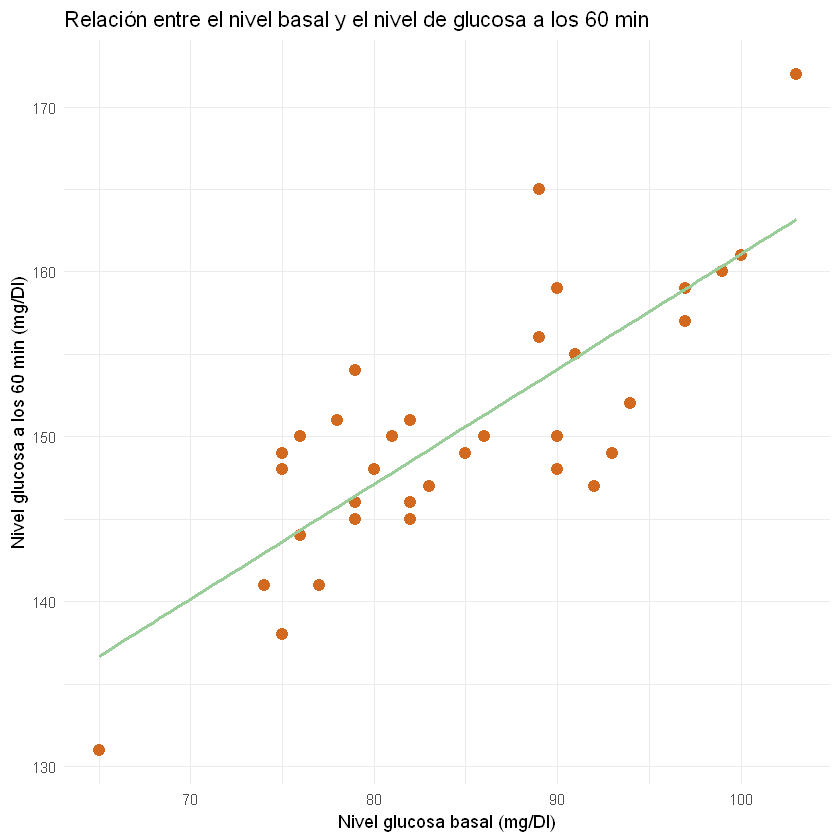

In [165]:
library(ggplot2)
ggplot(grupo1, aes(x = `Nivel glucosa basal`, y = `Nivel glucosa 60 min`)) +
  geom_point(color = "chocolate", size = 3) +
  geom_smooth(method = "lm", se = FALSE, color = "darkseagreen3") +
  labs(
    title = "Relación entre el nivel basal y el nivel de glucosa a los 60 min",
    x = "Nivel glucosa basal (mg/Dl)",
    y = "Nivel glucosa a los 60 min (mg/Dl)"
  ) +
  theme_minimal()

Por otro lado, en el `gráfico de dispersión` podemos ver una clara tendencia ascendente, es decir; una **relación positiva** entre ambas variables. A medida que aumenta el nivel basal de glucosa, también lo hace el nivel de glucosa a los 60 minutos. La `línea de regresión` superpuesta refuerza esta idea al mostrar la dirección y la magnitud promedio de la relación.

### b) Obtener un modelo lineal que explica el nivel de glucosa en sangre a los 60 minutos en función del nivel basal del paciente y realizar la estimación para un paciente cuyo nivel basal es 83 mg/Dl

In [166]:
recta <-  lm(`Nivel glucosa 60 min` ~ `Nivel glucosa basal`, data = grupo1)
summary(recta)


Call:
lm(formula = `Nivel glucosa 60 min` ~ `Nivel glucosa basal`, 
    data = grupo1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4972 -3.0284 -0.3754  2.5325 11.5934 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           91.38365    7.84251  11.652 3.08e-13 ***
`Nivel glucosa basal`  0.69689    0.09212   7.565 1.06e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.751 on 33 degrees of freedom
Multiple R-squared:  0.6343,	Adjusted R-squared:  0.6232 
F-statistic: 57.23 on 1 and 33 DF,  p-value: 1.056e-08


El `modelo lineal` obtenido indica que el nivel de glucosa a los 60 minutos puede explicarse mediante la ecuación **Nivel glucosa 60 min = 91,38 + 0,697 * Nivel glucosa basal**, lo que sugiere que por cada unidad adicional en el nivel basal de glucosa, el nivel de glucosa a los 60 minutos aumenta en promedio **0,697 unidades**. 

Respecto al coeficiente de determinación ajustado (**0,623**) indica que el modelo explica el **62,3%** de la variabilidad del nivel de glucosa a los 60 minutos, lo que refleja una relación moderada entre ambas variables.

In [167]:
nuevo_paciente <- data.frame(`Nivel glucosa basal` = 83, check.names = FALSE)
predict(recta, newdata = nuevo_paciente, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,149.2252,147.5612,150.8893


En cuanto a la `estimación realizada para un paciente con un nivel basal de glucosa de 83 mg/Dl`, se ha obtenido un nivel de glucosa a los 60 minutos de **149,23 mg/Dl**, con un intervalo de confianza del **95%** que va desde **147,56 mg/Dl** hasta **150,89 mg/Dl**. Esto proporciona un rango estrecho que refuerza la fiabilidad de la predicción y refleja que el modelo no solo es estadísticamente significativo, sino que también es útil para realizar estimaciones en este rango de datos.

### c) ¿Qué tanto por ciento del nivel de glucosa en sangre pasados 60 minutos no queda explicado por el anterior modelo?

In [168]:
r2_ajustado <- summary(recta)$adj.r.squared

(1 - r2_ajustado) * 100

[1] 37.68217

El `porcentaje de variabilidad no explicado por el modelo` es aproximadamente **37,68%**, por lo que una parte significativa de la variabilidad en los niveles de glucosa en sangre a los 60 minutos no puede ser atribuida únicamente al nivel basal de glucosa. En concreto, otros factores (características individuales del paciente, metabolismo, dieta, etc.) podrían estar influyendo en los niveles de glucosa a los 60 minutos y no se incluyen en el modelo actual. 

En conclusión, aunque el modelo explica una proporción considerable de la variabilidad, podríamos decir que aunque es relevante no es suficiente por sí solo para predecir POR COMPLETO los niveles de glucosa a los 60 minutos, y se podría considerar incluir variables adicionales en futuros análisis para mejorar el ajuste del modelo.

### d) Si aumentásemos el nivel basal de un paciente en 5 mg/Dl ¿Qué variación experimentaría su nivel de glucosa al cabo de 60 minutos??

In [169]:
pendiente <- coef(recta)[2] 
pendiente * 5

`Nivel glucosa basal` 
             3.484433

Un aumento de **5 mg/Dl** en el nivel basal de glucosa provocaría, según el `modelo ajustado`, un incremento promedio de aproximadamente **3,48 mg/Dl** en el nivel de glucosa a los 60 minutos.

---
## Ejercicio 3

Por último, terminaré este estudio resolviendo las cuestiones planteadas en el **Ejercicio 3**:

### a) Se quiere estudiar si se puede admitir que el nivel medio de glucosa en sangre en el momento de la ingestión en los jóvenes es 88 mg/Dl. Obtener el intervalo de confianza al 95% y al 99% para el nivel medio de glucosa en sangre de los jóvenes y posteriormente contesta a la cuestión planteada con los resultados obtenidos o con un contraste de hipótesis

In [170]:
media <- mean(grupo1$`Nivel glucosa basal`, na.rm = TRUE)
desviacion_estandar <- sd(grupo1$`Nivel glucosa basal`, na.rm = TRUE)
n <- length(grupo1$`Nivel glucosa basal`)
error_estandar <- desviacion_estandar / sqrt(n)

alpha_95 <- 0.05
alpha_99 <- 0.01

ic_95 <- c(
  media - qt(1 - alpha_95 / 2, df = n - 1) * error_estandar,
  media + qt(1 - alpha_95 / 2, df = n - 1) * error_estandar
)

ic_99 <- c(
  media - qt(1 - alpha_99 / 2, df = n - 1) * error_estandar,
  media + qt(1 - alpha_99 / 2, df = n - 1) * error_estandar
)

In [171]:
media

[1] 84.68571

La `media` del nivel basal de glucosa para los pacientes jóvenes del grupo 1 -como ya vimos en el Ejercicio 1- es de aproximadamente **84,69 mg/Dl**, y representa el valor promedio observado en la muestra.

In [172]:
ic_95

[1] 81.64759 87.72384

El `intervalo de confianza al 95%` para la media del nivel basal de glucosa está entre **81,65 mg/Dl** y **87,72 mg/Dl**. Esto implica que, con un nivel de confianza del 95%, el verdadero nivel medio de glucosa basal de esta población está dentro de este rango. 

Este intervalo no incluye el valor de **88 mg/Dl**.

In [173]:
ic_99

[1] 80.60687 88.76456

Por otro lado, el `intervalo de confianza al 99%` es más amplio, oscilando entre **80,61 mg/Dl** y **88,76 mg/Dl**.

A diferencia del intervalo al 95%, este sí incluye el valor teórico de **88 mg/dL**.

In [174]:
t.test(grupo1$`Nivel glucosa basal`, mu = 88)


	One Sample t-test

data:  grupo1$`Nivel glucosa basal`
t = -2.217, df = 34, p-value = 0.03342
alternative hypothesis: true mean is not equal to 88
95 percent confidence interval:
 81.64759 87.72384
sample estimates:
mean of x 
 84.68571 


- `t (valor estadístico)`: el valor de **-2,217** indica que la media muestral de glucosa basal está a -2,217 errores estándar por debajo del valor hipotético de **88 mg/Dl**. Esto refleja una diferencia significativa entre la media observada y la planteada en la hipótesis nula.
- `p-valor`: el valor de **0,3342** indica que al nivel de significancia del 5% hay suficiente evidencia estadística para rechazar la hipótesis nula de que la media es **88 mg/Dl**. Sin embargo, como el p-valor es mayor que 0,01, no se rechaza la hipótesis nula al nivel de significancia más estricto del 1%.

**Conclusiones**

Al nivel de significancia del **5%**, se concluye que la media de glucosa basal en sangre para los pacientes jóvenes **es significativamente diferente de 88 mg/Dl**, ya que el intervalo de confianza al 95% no incluye este valor y el p-valor es menor que 0,05.

No obstante, al nivel de significancia más estricto del **1%**, **no hay suficiente evidencia para rechazar la hipótesis nula**, ya que el intervalo de confianza al 99% incluye el valor de 88 mg/Dl y el p-valor es mayor que 0,01. Esto sugiere que la diferencia observada depende del nivel de confianza considerado.

### b) Obtener los intervalos de confianza al 95% para la diferencia de medias en el nivel basal de glucosa entre adultos y jovenes e interpreta los resultados. ¿Se puede concluir que el nivel basal de glucosa de los jóvenes y los adultos es el mismo con nivel de significación del 5%? Suponiendo que se cumplen las condiciones iniciales teóricas para obtener los intervalos de confianza

In [175]:
grupo2 <- test_glucosa[test_glucosa$`Grupo de control` == 2, ]

t_test_result <- t.test(
  grupo1$`Nivel glucosa basal`,
  grupo2$`Nivel glucosa basal`,
  var.equal = TRUE, 
  conf.level = 0.95
)

In [176]:
t_test_result


	Two Sample t-test

data:  grupo1$`Nivel glucosa basal` and grupo2$`Nivel glucosa basal`
t = -2.3138, df = 63, p-value = 0.02395
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.7858509 -0.6427205
sample estimates:
mean of x mean of y 
 84.68571  89.40000 


El `intervalo de confianza al 95% para la diferencia de medias en el nivel basal de glucosa entre jóvenes y adultos` es de **[-8,79, -0,64]**. Este intervalo no incluye el valor 0, lo que indica que existe una diferencia estadísticamente significativa entre las medias de ambos grupos al nivel de significación del 5%. 

Como hemos comprobado repetidas veces, la media estimada del nivel basal de glucosa en los jóvenes es de **84,69 mg/Dl**, mientras que en los adultos es de **89,40 mg/Dl**, lo que muestra que el nivel basal de glucosa de los adultos es mayor que el de los jóvenes.

El p-valor asociado al contraste de hipótesis es de **0,02395**, menor que 0,05, reforzándose la conclusión de que se puede rechazar la hipótesis nula de que las medias son iguales. 

**Conclusiones**

Por tanto, al nivel de significación del 5%, se concluye que hay una **diferencia significativa en los niveles basales de glucosa entre jóvenes y adultos**, siendo el nivel basal mayor en el grupo de los adultos.

### c) Se quiere estudiar la proporción de la población con un nivel basal de glucosa superior a 95 mg/Dl (prediabetes). A partir de la muestra del fichero (tomando todos los datos) obtener un intervalo de confianza al 98% y contrastar la hipótesis que la proporción de la población con glucosa superior a 95 mg/Dl es 0,15 con nivel de significación del 5%

In [177]:
n_total <- nrow(test_glucosa)
n_prediabetes <- sum(test_glucosa$`Nivel glucosa basal` > 95)
p_muestra <- n_prediabetes / n_total
p_muestra

[1] 0.1692308

La proporción de la `población con un nivel basal de glucosa superior a 95 mg/Dl` es de aproximadamente **16,92%**.

In [178]:
alpha_98 <- 0.02
error_estandar <- sqrt((p_muestra * (1 - p_muestra)) / n_total)
z_critico <- qnorm(1 - alpha_98 / 2)
ic_98 <- c(
  p_muestra - z_critico * error_estandar,
  p_muestra + z_critico * error_estandar
)
ic_98

[1] 0.0610381 0.2774234

Por su parte, el `intervalo de confianza al 98%` es de aproximadamente **[0,06, 0,28]**, lo que sugiere que con un nivel de confianza del 98% la proporción real de la población con niveles basales superiores a 95 mg/Dl se encuentra dentro de este rango; ya que este intervalo incluye el valor de 0,15.

In [179]:
alpha_95 <- 0.05
z_critico_95 <- qnorm(1 - alpha_95 / 2)
ic_95_2 <- c(
  p_muestra - z_critico_95 * sqrt((p_muestra * (1 - p_muestra)) / n_total),
  p_muestra + z_critico_95 * sqrt((p_muestra * (1 - p_muestra)) / n_total)
)
ic_95_2

[1] 0.0780777 0.2603838

Para finalizar, el `intervalo de confianza al 95% para la proporción de la población con niveles basales de glucosa superiores a 95 mg/Dl` es de aproximadamente **[0,0781, 0,2604]**, lo que indica que, con un nivel de confianza del 95%, la proporción real de la población prediabética se encuentra dentro de este rango. Como el valor hipotético de 0,15 está contenido dentro del intervalo, **no hay suficiente evidencia para rechazar la hipótesis nula de que la proporción real es 0,15 al nivel de significación del 5%**.

### d) ¿Se detecta una variación significativa del nivel de glucosa en sangre en el grupo de los adultos después de la toma ?

In [180]:
grupo2 <- test_glucosa[test_glucosa$`Grupo de control` == 2, ]

diferencias <- grupo2$`Nivel glucosa basal` - grupo2$`Nivel glucosa 60 min`

t.test(diferencias, mu = 0, conf.level = 0.95)
t.test


	One Sample t-test

data:  diferencias
t = -34.374, df = 29, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -87.33805 -77.52862
sample estimates:
mean of x 
-82.43333 


function (x, ...) 
UseMethod("t.test")
<bytecode: 0x000001c5b00f7d48>
<environment: namespace:stats>

Los resultados muestran que el valor de t es **-34,374**, con **29** grados de libertad y un p-valor extremadamente pequeño, lo que indica que **la diferencia entre los niveles basales y los niveles a los 60 minutos es altamente significativa**. 

Por otra parte, el `intervalo de confianza al 95% para la media de las diferencias` es **[-87,34, -77,53]**, sugiriendo que, con un nivel de confianza del 95%, el promedio de las diferencias entre los niveles basales y los niveles a los 60 minutos se encuentra en este rango negativo. 

La `media de las diferencias` es aproximadamente **-82,43**. Esto señala que, en promedio, los niveles de glucosa aumentaron en **82,43 mg/Dl** después de 60 minutos.

**Conclusiones**

Dado que el intervalo de confianza no incluye 0 y el p-valor es mucho menor que el nivel de significancia del 5%, podemos afirmar que hay una **variación significativa entre los niveles basales y los niveles a los 60 minutos en el grupo de adultos**. Específicamente, los niveles de glucosa en sangre aumentan significativamente después de la ingesta en este grupo.